In [1]:
# library(bruceR)
library(formatR)
library(ggplot2)
library(rio)
library(tidyverse)
library(showtext) # 支持中文
showtext_auto()
# library(data.table)

── Attaching core tidyverse packages ────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ──────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
载入需要的程辑包：sysfonts

载入需要的程辑包：showtextdb



### 读取数据

In [2]:
wdi <- import("WDI.rds")

wdi

,Country Name,Country,year,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,⋯,VA.PER.RNK.LOWER,VA.PER.RNK.UPPER,VA.STD.ERR,VC.BTL.DETH,VC.IDP.NWCV,VC.IDP.NWDS,VC.IDP.TOCV,VC.IHR.PSRC.FE.P5,VC.IHR.PSRC.MA.P5,VC.IHR.PSRC.P5
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,AFG,1960,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,Afghanistan,AFG,1961,120,NA,0.1437908,377500,57.87836,7650000,0.8702933,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,Afghanistan,AFG,1962,150,NA,0.1428571,378000,57.95502,7700000,0.8585082,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,Afghanistan,AFG,1963,200,NA,0.1419355,378500,58.03168,7750000,0.8463041,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,Afghanistan,AFG,1964,200,NA,0.1410256,379050,58.11600,7800000,0.8337329,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,Afghanistan,AFG,1965,300,NA,0.1410256,379100,58.12367,7800000,0.8154605,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,Afghanistan,AFG,1966,400,NA,0.1914486,379550,58.19266,7835000,0.8008670,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,Afghanistan,AFG,1967,500,NA,1.2748598,379790,58.22946,7844000,0.7836140,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,Afghanistan,AFG,1968,500,NA,1.9122896,379800,58.23099,7844000,0.7654341,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [3]:
Countrys =c("AUS","FRA","DEU","IND","IDN","JPN","KOR","PAK","RUS","GBR","USA","VNM","CHN")

### 选取12 国数据

In [4]:
wdi_13c  <-
wdi %>% filter(Country %in% Countrys)

In [5]:
wdi_13c[,1] %>% unique() %>% length()

[1] 13

### 变量名

In [6]:
var_ds  <-
wdi  %>% names() %>% unique()

###  变量选取

In [7]:
grep("GDP",var_ds) # 含有GDP的项目的索引

[1]  223  224  294  680  681  682  683  684  685  686  687  688  689  690  691
[16]  692  693  694  695  696  697  698  699  700  701  702  703  704  705  706
[31]  707  708  709  710 1178

In [8]:
var_ds  <- var_ds[grep("GDP",var_ds)]
var_ds

[1] "EG.GDP.PUSE.KO.PP"    "EG.GDP.PUSE.KO.PP.KD" "ER.GDP.FWTL.M3.KD"   
 [4] "NY.GDP.COAL.RT.ZS"    "NY.GDP.DEFL.KD.ZG"    "NY.GDP.DEFL.KD.ZG.AD"
 [7] "NY.GDP.DEFL.ZS"       "NY.GDP.DEFL.ZS.AD"    "NY.GDP.DISC.CN"      
[10] "NY.GDP.DISC.KN"       "NY.GDP.FCST.CD"       "NY.GDP.FCST.CN"      
[13] "NY.GDP.FCST.KD"       "NY.GDP.FCST.KN"       "NY.GDP.FRST.RT.ZS"   
[16] "NY.GDP.MINR.RT.ZS"    "NY.GDP.MKTP.CD"       "NY.GDP.MKTP.CN"      
[19] "NY.GDP.MKTP.CN.AD"    "NY.GDP.MKTP.KD"       "NY.GDP.MKTP.KD.ZG"   
[22] "NY.GDP.MKTP.KN"       "NY.GDP.MKTP.PP.CD"    "NY.GDP.MKTP.PP.KD"   
[25] "NY.GDP.NGAS.RT.ZS"    "NY.GDP.PCAP.CD"       "NY.GDP.PCAP.CN"      
[28] "NY.GDP.PCAP.KD"       "NY.GDP.PCAP.KD.ZG"    "NY.GDP.PCAP.KN"      
[31] "NY.GDP.PCAP.PP.CD"    "NY.GDP.PCAP.PP.KD"    "NY.GDP.PETR.RT.ZS"   
[34] "NY.GDP.TOTL.RT.ZS"    "SL.GDP.PCAP.EM.KD"

In [9]:
list.files(getwd()) #ls

[1] "Python：WDI数据处理.ipynb"      "R Data reshape.ipynb"          
 [3] "R：ggplot画图之facet分面.ipynb" "VarInfo.xlsx"                  
 [5] "WDI.1.csv"                      "WDI.2.csv"                     
 [7] "WDI.3.csv"                      "WDI.4.csv"                     
 [9] "WDI.5.csv"                      "WDI.6.csv"                     
[11] "WDI.7.csv"                      "WDI.rds"                       
[13] "WDI.xlsx"                       "WDI数据图示.ipynb"

In [10]:
var_info <- import("VarInfo.xlsx")

var_info %>% head(10)

,SeriesCode,指示名称,Topic,IndicatorName
,<chr>,<chr>,<chr>,<chr>
1,AG.AGR.TRAC.NO,拖拉机,Environment: Agricultural production,"Agricultural machinery, tractors"
2,AG.CON.FERT.PT.ZS,肥料消耗（肥料产量的百分比）,Environment: Agricultural production,Fertilizer consumption (% of fertilizer production)
3,AG.CON.FERT.ZS,肥料消耗（每公顷可耕地）,Environment: Agricultural production,Fertilizer consumption (kilograms per hectare of arable land)
4,AG.LND.AGRI.K2,农业土地（平方公里）,Environment: Land use,Agricultural land (sq. km)
5,AG.LND.AGRI.ZS,农业用地（土地面积百分比）,Environment: Land use,Agricultural land (% of land area)
6,AG.LND.ARBL.HA,耕地（公顷）,Environment: Land use,Arable land (hectares)
7,AG.LND.ARBL.HA.PC,可耕地（每人公顷）,Environment: Land use,Arable land (hectares per person)
8,AG.LND.ARBL.ZS,可耕地（土地面积百分比）,Environment: Land use,Arable land (% of land area)
9,AG.LND.CREL.HA,谷物生产下（公顷）,Environment: Agricultural production,Land under cereal production (hectares)


In [11]:
var_info %>% filter(SeriesCode %in% var_ds)

SeriesCode,指示名称,Topic,IndicatorName
<chr>,<chr>,<chr>,<chr>
EG.GDP.PUSE.KO.PP,GDP每单位能源使用（PPP $每公斤油量同等用品）,Environment: Energy production & use,GDP per unit of energy use (PPP $ per kg of oil equivalent)
EG.GDP.PUSE.KO.PP.KD,GDP每单位能源使用（常数2017 PPP $每公斤油量等效）,Environment: Energy production & use,NA
ER.GDP.FWTL.M3.KD,水生产率，总计（恒定2015年US $ GDP每立方米的总淡水提取）,Environment: Freshwater,NA
NY.GDP.COAL.RT.ZS,煤炭租金（GDP的百分比）,Environment: Natural resources contribution to GDP,Coal rents (% of GDP)
NY.GDP.DEFL.KD.ZG,通货膨胀，GDP缩水器（年度％）,Financial Sector: Exchange rates & prices,"Inflation, GDP deflator (annual %)"
NY.GDP.DEFL.KD.ZG.AD,通货膨胀，GDP缩水器：链接系列（年度％）,Financial Sector: Exchange rates & prices,"Inflation, GDP deflator: linked series (annual %)"
NY.GDP.DEFL.ZS,GDP Deflator（基本年度因国家 /地区而异）,Financial Sector: Exchange rates & prices,GDP deflator (base year varies by country)
NY.GDP.DEFL.ZS.AD,GDP Deflator：链接系列（基本年度随国家而异）,Financial Sector: Exchange rates & prices,GDP deflator: linked series (base year varies by country)
NY.GDP.DISC.CN,GDP的支出估计值（Current LCU）的差异,Economic Policy & Debt: National accounts: Local currency at current prices: Expenditure on GDP,Discrepancy in expenditure estimate of GDP (current LCU)


## 折线图

Warning message:
“Removed 70 rows containing missing values (`geom_line()`).”


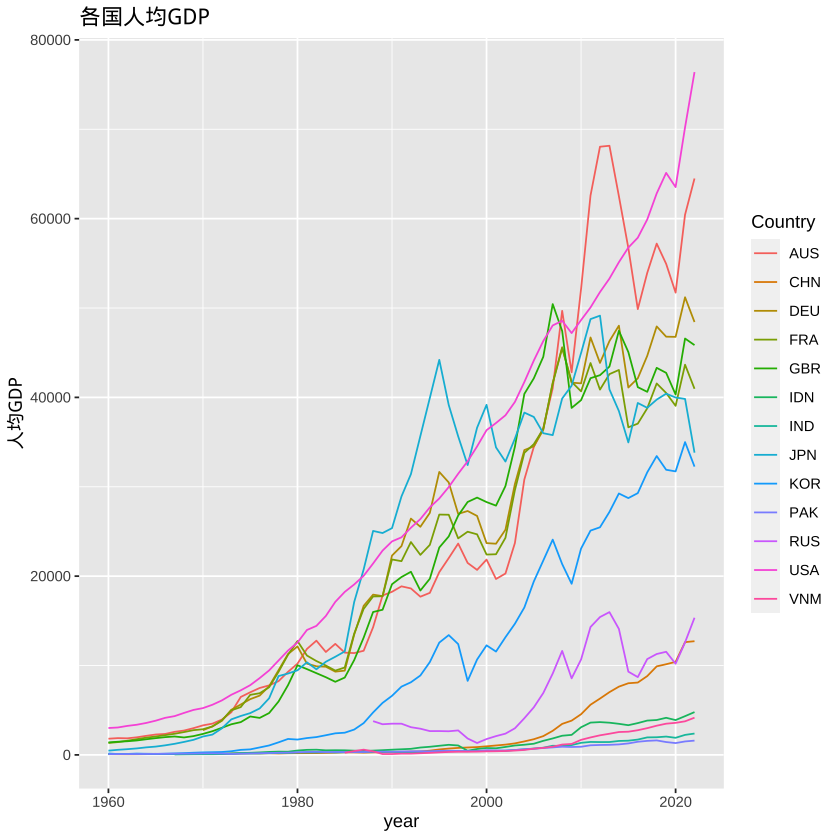

In [12]:
ggplot(data = wdi_13c, aes(x = year, y = NY.GDP.PCAP.CD, group = Country,
  colour = Country)) +
geom_line() +
  labs(x = "year", y = "人均GDP", title = "各国人均GDP")

Warning message:
“Removed 76 rows containing missing values (`geom_line()`).”


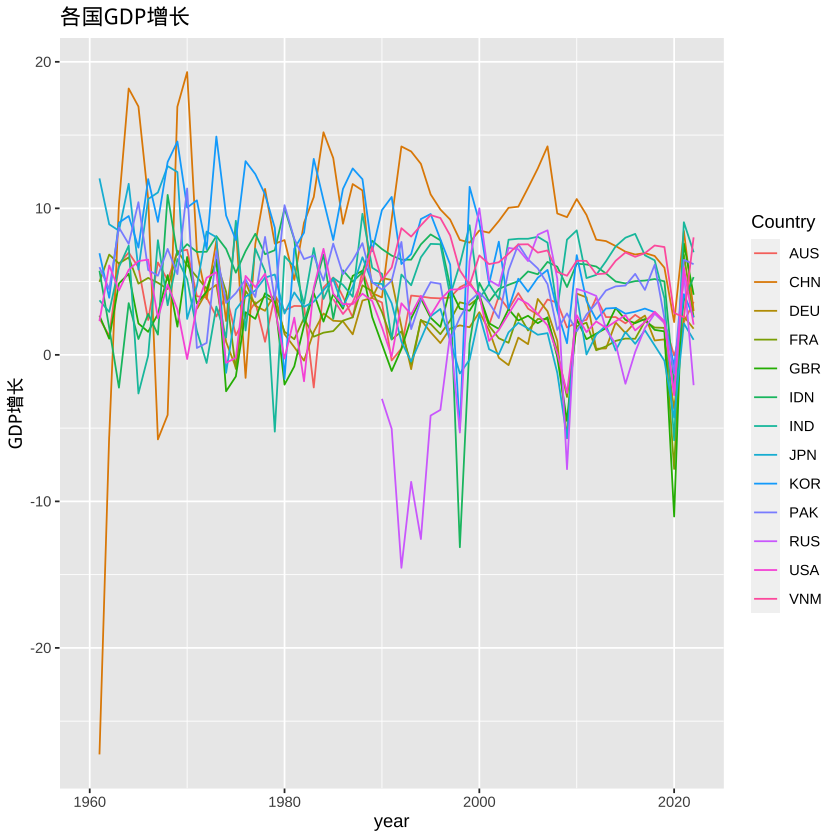

In [13]:
ggplot(data = wdi_13c, aes(x = year, y = NY.GDP.MKTP.KD.ZG, group = Country,
  colour = Country)) +
geom_line() +
  labs(x = "year", y = "GDP增长", title = "各国GDP增长")

In [14]:
p <- ggplot(wdi_13c, aes(year, NY.GDP.MKTP.KD.ZG)) + geom_line()

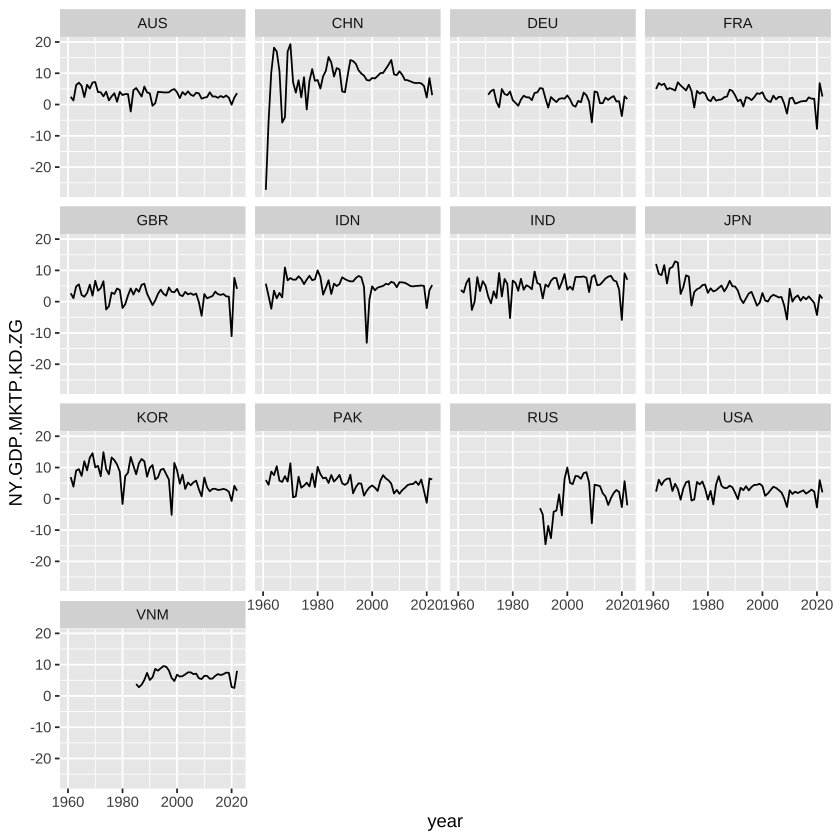

In [17]:
options(warn=-1)
p + facet_wrap(~Country)